# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [ ]:
# on Linux get and unzip manally

# !wget -q http://images.cocodataset.org/zips/train2014.zip
# !wget -q http://images.cocodataset.org/zips/val2014.zip
# !wget -q http://images.cocodataset.org/annotations/annotations_trainval2014.zip

# !wget -q http://images.cocodataset.org/zips/test2014.zip
# !wget -q http://images.cocodataset.org/annotations/image_info_test2014.zip

In [15]:
import os
import sys
# sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# initialize COCO API for instance annotations
# dataDir is a directory where annotation files are placed
dataDir = 'annotations_trainval2014'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)



loading annotations into memory...
Done (t=4.04s)
creating index...
index created!
loading annotations into memory...
Done (t=0.22s)
creating index...
index created!


In [16]:
for idx, (k, v) in enumerate(coco.anns.items()):
    print(k,v)
    if idx == 3:
        break

# get image dataset ids 
ids = list(coco.anns.keys())
len(ids)
catgs_id = coco.getCatIds()
len(catgs_id)
catgs_info = coco.loadCats(catgs_id)
catgs_info     
    

156 {'segmentation': [[239.97, 260.24, 222.04, 270.49, 199.84, 253.41, 213.5, 227.79, 259.62, 200.46, 274.13, 202.17, 277.55, 210.71, 249.37, 253.41, 237.41, 264.51, 242.54, 261.95, 228.87, 271.34]], 'area': 2765.1486500000005, 'iscrowd': 0, 'image_id': 558840, 'bbox': [199.84, 200.46, 77.71, 70.88], 'category_id': 58, 'id': 156}
509 {'segmentation': [[247.71, 354.7, 253.49, 346.99, 276.63, 337.35, 312.29, 333.49, 364.34, 331.57, 354.7, 327.71, 369.16, 325.78, 376.87, 333.49, 383.61, 330.6, 379.76, 321.93, 365.3, 320.0, 356.63, 317.11, 266.02, 331.57, 260.24, 334.46, 260.24, 337.35, 242.89, 338.31, 234.22, 338.31, 234.22, 348.92, 239.04, 353.73, 248.67, 355.66, 252.53, 353.73]], 'area': 1545.4213000000007, 'iscrowd': 0, 'image_id': 200365, 'bbox': [234.22, 317.11, 149.39, 38.55], 'category_id': 58, 'id': 509}
603 {'segmentation': [[274.58, 405.68, 298.32, 405.68, 302.45, 402.58, 333.42, 404.65, 356.13, 397.42, 386.06, 386.06, 398.45, 367.48, 399.48, 356.13, 392.26, 347.87, 382.97, 350.

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

image/s with given category: [247808, 288769, 184324, 294918, 546823, 559113, 495626, 57353, 169996, 229391, 477202, 8211, 278550, 522262, 141334, 411674, 393243, 139291, 458781, 274460, 190494, 258078, 67616, 473118, 296994, 356387, 231460, 210980, 210982, 270376, 129065, 356394, 239656, 272430, 34866, 124979, 364596, 309302, 385078, 467000, 157756, 258112, 387136, 61507, 65604, 227399, 74, 129100, 405580, 284749, 301135, 428111, 204887, 153692, 452700, 381021, 274528, 127074, 395364, 454762, 303210, 403565, 405614, 573549, 243825, 319607, 268412, 409725, 565374, 436350, 63619, 227460, 309391, 264336, 10393, 415904, 266400, 319655, 114855, 315564, 49327, 274612, 268469, 100539, 565438, 43202, 417987, 145604, 397514, 344271, 534736, 559312, 399570, 225494, 442582, 362714, 49371, 352476, 352478, 391392, 424162, 57570, 346343, 471273, 18666, 520427, 434410, 565485, 399595, 327919, 137451, 420081, 135410, 106739, 59635, 246005, 221433, 477435, 334077, 532735, 534784, 233727, 356612, 15591

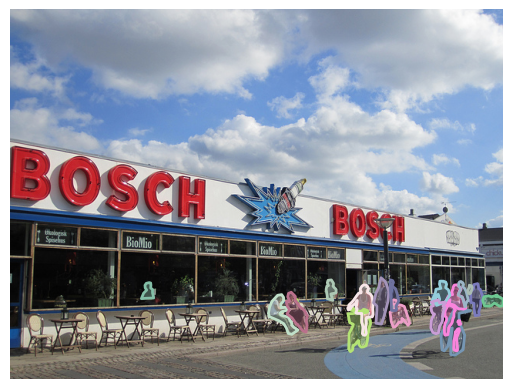

In [43]:
#COCO_val2014_000000435081.jpg
combine_catg_ids = coco.getCatIds(catNms=['person', 'bicycle'])
imgIds_with_catgs = coco.getImgIds(catIds=combine_catg_ids)
print(f"image/s with given category: {imgIds_with_catgs}")
img_with_catgs = coco.loadImgs(ids=imgIds_with_catgs[1])[0]
print(f"Image with categories as dict: {img_with_catgs}")
selected_img_with_catgs = 'val2014/' + img_with_catgs['file_name']
sel_path = 'train2014/COCO_train'
I = io.imread(fname=selected_img_with_catgs)
plt.axis('off')
plt.imshow(I)
annts_ids = coco.getAnnIds(imgIds=img_with_catgs['id'], catIds=combine_catg_ids, iscrowd=None)
annts = coco.loadAnns(annts_ids)
coco.showAnns(annts)

## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

img dict: {'license': 4, 'file_name': 'COCO_val2014_000000514826.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000514826.jpg', 'height': 426, 'width': 640, 'date_captured': '2013-11-17 05:20:32', 'flickr_url': 'http://farm7.staticflickr.com/6171/6179115649_b110ff816c_z.jpg', 'id': 514826}
http://images.cocodataset.org/val2014/COCO_val2014_000000514826.jpg


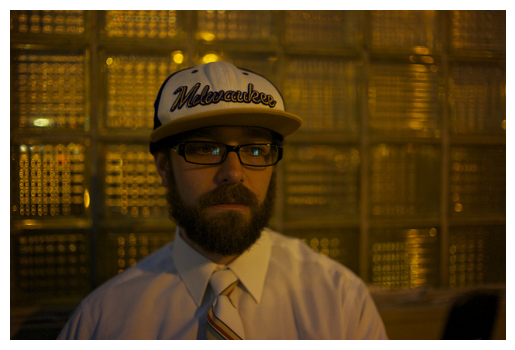

a man in a dress shirt, tie, and a trucker hat
A man in a dress shirt, tie, and Milwaukee baseball cap stands in front of a textured glass block wall.
A person with a hat and a tie.
A bearded man wearing a tie and a baseball cap.
this is a man with a beard and some glasses


In [42]:

# pick a random image and obtain the corresponding img info dict and get url from that
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']
print(f"img dict: {img}")

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)


## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate captions from images.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)